In [19]:
import torch
import torch.nn as nn
import torch.optim as optim

In [33]:
# Generate 11 more realistic 2x1 vectors for area and number of bedrooms
inputs = torch.tensor([
    [1200, 3],
    [850, 2],
    [1500, 4],
    [700, 1],
    [1100, 3],
    [950, 2],
    [1800, 4],
    [600, 1],
    [1300, 3],
    [1000, 2],
    [2000, 5],
    [1000, 4]],
  dtype=torch.float32  # Best to set things explicitly
)

labels = torch.tensor([
      [0],
      [0],
      [1],
      [0],
      [1],
      [0],
      [0],
      [0],
      [1],
      [1],
      [0],
      [0],
    ],
    dtype=torch.float32 # Best to set things explicitly
)

inputs.shape
# labels.shape

torch.Size([12, 2])

Normalize the inputs
- When you don't do this, the loss just stays constant because of the bigger "area" contribution.

In [58]:
from sklearn.preprocessing import StandardScaler

# Normalize the input data
scaler = StandardScaler()
inputs_normalized = scaler.fit_transform(inputs)

# Convert the normalized numpy array back to a PyTorch tensor
inputs_normalized = torch.tensor(inputs_normalized, dtype=torch.float32)

display(inputs_normalized)

tensor([[ 0.0822,  0.1374],
        [-0.7812, -0.6868],
        [ 0.8223,  0.9615],
        [-1.1513, -1.5110],
        [-0.1645,  0.1374],
        [-0.5345, -0.6868],
        [ 1.5625,  0.9615],
        [-1.3980, -1.5110],
        [ 0.3289,  0.1374],
        [-0.4112, -0.6868],
        [ 2.0559,  1.7857],
        [-0.4112,  0.9615]])

# Simple Logistic Regression Model

A "unit" in NN Lingo contains 2 trainable params, bias and weight term(s).

![example](https://res.cloudinary.com/dry8rzbyx/image/fetch/s---RDuZ9Xt--/f_auto/q_auto/c_scale,w_1536/https://www.knime.com/sites/default/files/public/1-intro-deep-neural-networks.png)


In [68]:
n_inputs = inputs.shape[1] # area + number of rooms
n_outputs = 1 # binary classification

In [125]:
def get_linear_model():
  return nn.Sequential(
      nn.Linear(n_inputs, n_outputs), # 2 weight terms
      nn.Sigmoid() # 1 bias term
  )

linear_model = get_linear_model()

In [126]:
# 1 bias term (cuz 1 output) and 2 weight terms = 3 terms
[i for i in linear_model.parameters()]

[Parameter containing:
 tensor([[-0.5478,  0.1177]], requires_grad=True),
 Parameter containing:
 tensor([0.0767], requires_grad=True)]

# 2-layer FNN
Each of the 10 units in the first layer contain 2 weights and 1 bias.


In [128]:
def get_fnn_model():
  return nn.Sequential(
      nn.Linear(n_inputs, 10),  # 10 units with 2 weights and 1 bias term each = 30 params
      nn.Sigmoid(),
      nn.Linear(10, n_outputs), # 10 units with 1 weight (from prev layer) and 1 bias term = 21 params
      nn.Sigmoid()
  )

fnn_model = get_fnn_model()

In [129]:
[i for i in fnn_model.parameters()]

[Parameter containing:
 tensor([[ 0.1059, -0.5872],
         [ 0.0502, -0.5081],
         [-0.0108,  0.1815],
         [-0.6844,  0.2433],
         [-0.6660, -0.4351],
         [ 0.3144,  0.7015],
         [-0.3412, -0.7029],
         [-0.5882, -0.2510],
         [-0.2165,  0.3922],
         [-0.2992,  0.0485]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0428, -0.5437,  0.6724, -0.2954,  0.3214,  0.4051, -0.0652,  0.6508,
          0.6756, -0.1113], requires_grad=True),
 Parameter containing:
 tensor([[ 0.0272, -0.2900, -0.1805,  0.0920,  0.2713,  0.1591, -0.1848, -0.2366,
          -0.2408,  0.1339]], requires_grad=True),
 Parameter containing:
 tensor([-0.2573], requires_grad=True)]

Note: if you keep training on the same model (i.e. using fnn_model or linear_model directly), the model parameters will at some point converge and not show nice plots. Hence, the `get_X`

In [130]:
def train(
    model: nn.Sequential,
    i: torch.tensor,
    o: torch.tensor,
    loss_history: list):
  # lr of 001 is common
  # Corrected optimizer initialization
  optimizer = optim.SGD(model.parameters(), lr=0.5) # Implements Gradient Descent
  criterion = nn.BCELoss() # Binary Cross Entropy

  for step in range(500):
    optimizer.zero_grad() # Don't keep track of param gradients: clear each step. (no history)

    outputs = model(i) # Make sure to normalize!
    loss = criterion(outputs, labels) # Calculate loss
    loss.backward() # compute gradients
    optimizer.step() # update weights with lr
    loss_history.append(loss.item()) # Store the loss value

log_hist = []
fnn_hist = []

# outputs = model(inputs)  # With un normalized inputs, the loss just doesn't reduce.
train(get_linear_model(), inputs_normalized, labels, log_hist)
train(get_fnn_model(), inputs_normalized, labels, fnn_hist)

Conclusion:
- The fnn model clearly is going hard with "over" fitting.

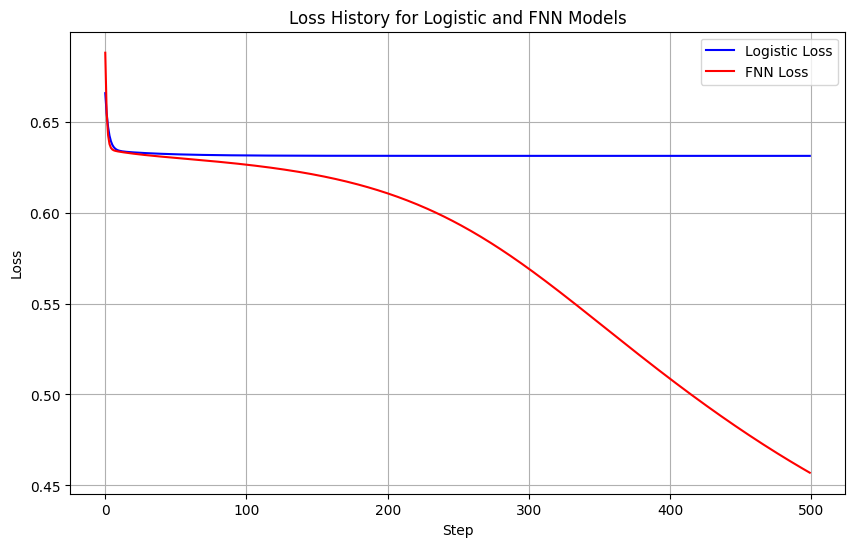

In [131]:
# prompt: plot the loss_history variable

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) # Optional: Adjust figure size

plt.plot(log_hist, label='Logistic Loss', color='blue')
plt.plot(fnn_hist, label='FNN Loss', color='red')

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Loss History for Logistic and FNN Models')
plt.legend() # Add a legend to identify the lines
plt.grid(True) # Optional: Add a grid for better readability

plt.show()